# 假设检验

先验知识：T 置信区间

样本量比较小的时候一般使用T分 布 ，T置信区间和之前讨论的正态分布置信区间类
似 ：$E_{s t} \pm T Q \times S E_{E s t}$, t分布在样本量很大时非常近似于正态分布。当一个案例 中t分布和正态分布都可以使用时使用t分布。t置信区间：$\bar{x} \pm t_{n-1} * S_{\bar{x}}$
使用manipulate包来观察t分布在不同自由度下的变化


In [4]:
library(manipulate)
k <- 1000
xvals <- seq(-5, 5, length = k)
length(xvals)


[1] 1000

In [5]:
myplot <- function(df) {
    d <- data.frame(
        y = c(dnorm(xvals), dt(xvals, df)), x = xvals,
        dist = factor(rep(c("Normal", "T"), c(k, k)))
    )
    g <- ggplot(d, aes(x = x, y = y)) +
        geom_line(size = 2, aes(colour = dist))
    g
}


In [10]:
manipulate(myplot(mu), mu = slider(1, 30, step = 1))


ERROR: Error in manipulate(myplot(mu), mu = slider(1, 30, step = 1)): The manipulate package must be run from within RStudio


## 计算不同样本类型的T置信区间
配对样本T置信区间，使用自带的sleep数据：  
  

In [11]:
data(sleep)
g1 <- sleep$extra[1:10]
g2 <- sleep$extra[11:20]
diff <- g2 - g1
diff


[1] 1.2 2.4 1.3 1.3 0.0 1.0 1.8 0.8 4.6 1.4

In [26]:
sleep


extra,group,ID
<dbl>,<fct>,<fct>
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9


In [25]:
g2


[1]  1.9  0.8  1.1  0.1 -0.1  4.4  5.5  1.6  4.6  3.4

In [19]:
qt(0.975, n - 1)


[1] 2.262157

In [22]:
mn <- mean(diff)
s <- sd(diff)

n <- 10
mn + c(-1, 1) * qt(0.975, n - 1) * s / sqrt(n)

mn


[1] 0.7001142 2.4598858

[1] 1.58

In [46]:
t.test(g2, g1, paired = T)



	Paired t-test

data:  g2 and g1
t = 4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.7001142 2.4598858
sample estimates:
mean difference 
           1.58 


In [23]:
t.test(g2, g1, paired = T)$conf[1:2]


[1] 0.7001142 2.4598858

In [48]:
t.test(diff, mu = 0)



	One Sample t-test

data:  diff
t = 4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7001142 2.4598858
sample estimates:
mean of x 
     1.58 


In [47]:
mean(diff) / sd(diff) / sqrt(n)


[1] 0.4062128

In [52]:
## 累计分布

(1 - pt(4.0621, 9)) * 2


[1] 0.002833008

In [34]:
I(relevel(sleep$group, 2))


[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
Levels: 2 1

In [56]:
t.test(extra ~ group,
    data = sleep,
    paired = T
)


ERROR: Error in t.test.formula(extra ~ group, data = sleep, paired = T): cannot use 'paired' in formula method


## 同方差独立组的T置信区间
对于两组独立同分布，且样本量不同的样本$X_i, Y_i$(对应样本量$n_x, n_y$),不能使用配
对检验，注意这里我们假设两样本同分布，即总体方差相同，但是实际上我们得到的 是样本方差，实际数值未必相同。
$(1-\alpha) \times 100 \%$水平下，$\mu_y-\mu_x$的$t$置信区间:
$$\bar{Y}-\bar{X} \pm t_{n_x+n_y-2,1-\alpha / 2} S_p\left(\frac{1}{n_x}+\frac{1}{n_y}\right)^{1 / 2}$$
其中：$S_p^2=\left\{\left(n_x-1\right) S_x^2+\left(n_y-1\right) S_y^2\right\} /\left(n_x+n_y-2\right)$    
注意使用配对比不使用配对方差包含的信息更多，即在能配对的情况下，使用配对得
到的结果更准确。

In [39]:
t.test(extra ~ I(relevel(group, 2)), data = sleep)$conf[1:2]


[1] -0.2054832  3.3654832

## 配对数据描述


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


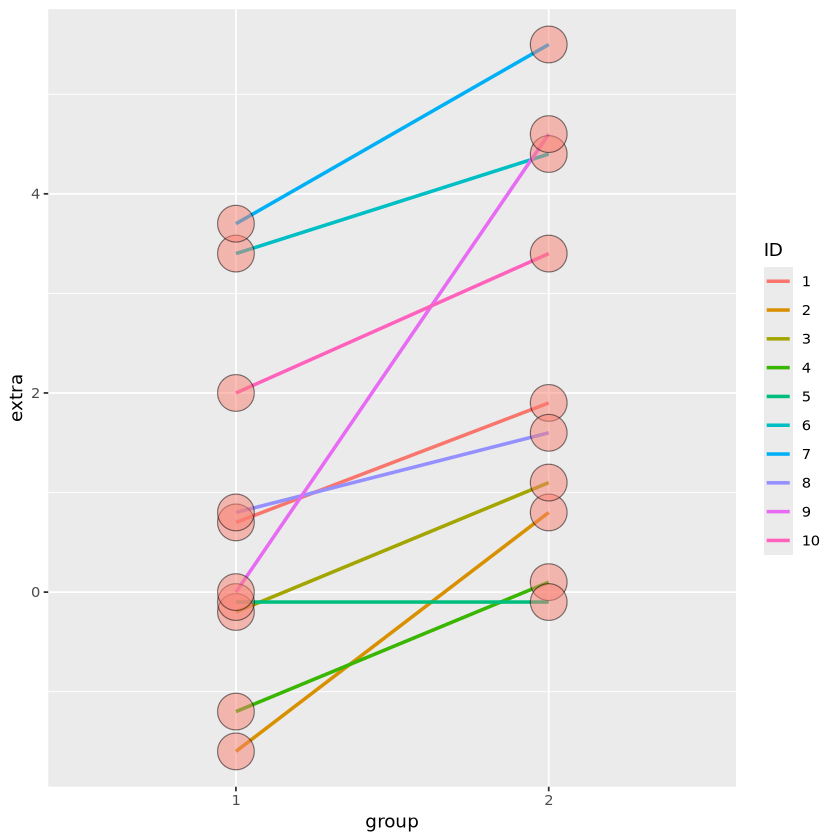

In [41]:
library(ggplot2)
g <- ggplot(sleep, aes(x = group, y = extra, group = factor(ID)))
g <- g + geom_line(size = 1, aes(colour = ID)) + geom_point(size = 10, pch = 21, fill = "salmon", alpha = .5)
g


## 异方差独立组的T置信区间

如果不确定两组样本是否同方差，则可以假设两组样本异方差，对应计算方法如下：
$$\bar{Y}-\bar{X} \pm t_{d f} \times\left(\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}\right)^{1 / 2}$$

其中自由度：
$df=\frac{\left(S_x^2 / n_x+S_y^2 / n_y\right)^2}{\left(\frac{S_x^2}{n_x}\right)^2 /\left(n_x-1\right)+\left(\frac{S_y^2}{n_y}\right)^2 /\left(n_y-1\right)}$


## 单样本T检验

通过单样本数据判断总体均值是否与假设的检验值之间存在显著性差异，是对总体均 值的假设检验。检验步骤如下：
原假设：
- $H_0$, 总体均值$\mu$等于$\mu_0$    
- 显著性水平：选取常用的$\alpha=5 \%$
- 通过样本数据计算t统计量：$t=\frac{\left(\bar{x}-\mu_0\right)}{S_{\bar{x}}}$
- 通过t统计量求得相应的p值来判断是否拒绝原假设

In [43]:
t.test(sleep$rate, mu = 0.1)


Warning message in mean.default(x):
“argument is not numeric or logical: returning NA”


ERROR: Error in var(x): 'x' is NULL


## 多变量关系检验方法综述
|    X\Y   |  分类(包含名义和等级)   |   连续  |
| ---- | ---- |----|
|   分类(包含名义和等级)    |   交叉表(列联表)分析         |  两样本T检验，方差分析(多分类，ANOVA)  |
|   连续    |   两样本T检验，方差分析(多分类，ANOVA)       |  相关分析  |


## 两样本T检验

T 检验用于检测均值的差异性，单样本T检验检验的是假设的总体均值和样本均值的差  异；双样本T检验检验的是两个样本均值的差异是否显著。常用于检验某二分类变量区 分下的某连续变量是否有显著差异。
这里我们分析用到的数据是信用卡数据creditcard_exp.csv,  变量"avg_exp"表示信用 卡消费，"gender"    '表示性别(男=1)。

In [58]:
creditcard_exp <- read.csv("data/creditcard_exp.csv", fileEncoding = "GBK")
creditcard_exp <- na.omit(creditcard_exp)
creditcard_exp$gender <- as.factor(creditcard_exp$gender)
creditcard_exp$edu_class <- as.factor(creditcard_exp$edu_class)
creditcard_exp[runif(3, 1, nrow(creditcard_exp)), c("avg_exp", "gender")]


,avg_exp,gender
,<dbl>,<fct>
61,485.65,0
50,711.89,0
13,1102.20,1


$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  163.2   593.3   813.6   925.7  1204.8  1992.4 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  648.1   829.9  1020.0  1128.5  1238.2  2430.0 


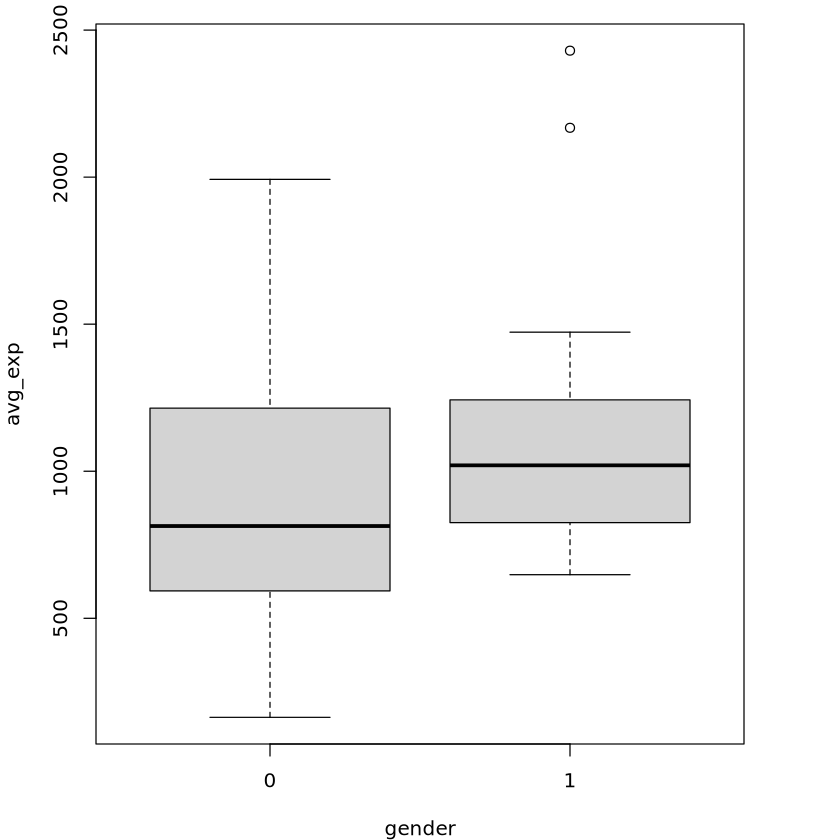

In [59]:
attach(creditcard_exp)
par(mar = c(4, 4, 1, 4))
tapply(avg_exp, gender, summary)
boxplot(avg_exp ~ gender) # $`0


## 前提条件

双样本T检验需要满足的前提条件：
观测之间相互独立；每组均服从正态分布
这里需要注意两组方差的异同，方差相同与方差不同对应的T统计量的计算公式是不一 样的。方差的异同可以通过方差齐性检验判断：
原假设：两个样本方差相同      
$\text { F统计量: } F=\frac{\max \left(S_1^2, S_2^2\right)}{\min \left(S_1^2, S_2^2\right)} \text { 服从F分布:F-distribution(wiki) }$


## 双样本T 检验流程


- 根据两样本数据或者是分组变量计算相应的均值 
- 进行方差齐性检验
- 进行双样本T检验，根据方差齐性检验的结果设置T检验的参数

In [65]:
avg_exp


[1] 1217.03 1251.50  856.57 1321.83  816.03 1151.15 1233.77  802.52 2167.77
[10]  654.58 1102.20 2430.03 1052.35  791.98 1672.20 1342.00  883.72  726.64
[19]  552.83  987.66 1214.54 1472.82  744.66 1344.05 1778.30  834.47  648.15
[28]  884.58 1606.43  959.83 1992.39 1752.47 1434.55  565.80 1581.94  711.89
[37]  994.54  888.46  701.07  806.13 1299.37  809.51  610.25  485.65  963.68
[46]  993.87  524.00 1403.72 1629.05  745.87  527.19  520.38  251.56  817.79
[55]  889.08 1048.34  847.78  593.11  772.69  545.20  905.52 1175.49 1006.35
[64]  727.62  695.85  491.04  468.61  593.92  418.78  163.18

In [66]:
gender


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

In [62]:
var.test(avg_exp ~ gender)



	F test to compare two variances

data:  avg_exp by gender
F = 0.86857, num df = 49, denom df = 19, p-value = 0.6702
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3779117 1.7529818
sample estimates:
ratio of variances 
          0.868572 


In [63]:
t.test(avg_exp ~ gender, var.equal = T)



	Two Sample t-test

data:  avg_exp by gender
t = -1.7429, df = 68, p-value = 0.08587
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -435.04352   29.39192
sample estimates:
mean in group 0 mean in group 1 
       925.7052       1128.5310 


In [64]:
t.test(avg_exp ~ gender, var.equal = F)



	Welch Two Sample t-test

data:  avg_exp by gender
t = -1.6904, df = 32.953, p-value = 0.1004
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -446.96001   41.30841
sample estimates:
mean in group 0 mean in group 1 
       925.7052       1128.5310 
